#### **Problem Statement:**

**The target feature is yield which is a continuous variable. The task is to classify this variable based on the other 17 features step-by-step by going through each day's task. The evaluation metrics will be 'RMSE score'**


**About Dataset**:
    
**The dataset used for predictive modelling was generated by the Wild Blueberry Pollination Simulation Model, which is an open-source, spatially-explicit computer simulation program, that enables exploration of how various factors, including plant spatial arrangement, outcrossing and self-pollination, bee species compositions and weather conditions, in isolation and combination, affect pollination efficiency and yield of the wild blueberry agro-ecosystem. The simulation model has been validated by the field observation and experimental data collected in Maine USA and Canadian Maritimes during the last 30 years and now is a useful tool for hypothesis testing and theory development for wild blueberry pollination researches. This simulated data provides researchers who have actual data collected from field observation and those who wants to experiment the potential of machine learning algorithms response to real data and computer simulation modelling generated data as input for crop yield prediction models.**

In [2]:
# for handling the data
import pandas as pd
import numpy as np

# for data visualization

import matplotlib.pyplot as plt
import seaborn as sns

# for presentation
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('WildBlueberryPollinationSimulationData.csv')


# Exploratory Data Analysis

In [4]:
df.head() # to display the first 5 rows of dataset

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


### Checking the basic information of dataset

In [5]:
df.info() # loading train dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Row#                  777 non-null    int64  
 1   clonesize             777 non-null    float64
 2   honeybee              777 non-null    float64
 3   bumbles               777 non-null    float64
 4   andrena               777 non-null    float64
 5   osmia                 777 non-null    float64
 6   MaxOfUpperTRange      777 non-null    float64
 7   MinOfUpperTRange      777 non-null    float64
 8   AverageOfUpperTRange  777 non-null    float64
 9   MaxOfLowerTRange      777 non-null    float64
 10  MinOfLowerTRange      777 non-null    float64
 11  AverageOfLowerTRange  777 non-null    float64
 12  RainingDays           777 non-null    float64
 13  AverageRainingDays    777 non-null    float64
 14  fruitset              777 non-null    float64
 15  fruitmass             7

In [11]:
## Checking the is there null value available in the train dataset

In [6]:
df.isnull().sum()

Row#                    0
clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

#### Now checking the Unique Values of data set

In [8]:
# for Train Dataset

for col in df:
    print("---**"+col+"**---")
    print(df[col].unique())

---**Row#**---
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242

#### Descriptive Statistics

In [9]:
df.describe(include='all')

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,388.000000,18.767696,0.417133,0.282389,0.468817,0.562062,82.277091,49.700515,68.723037,59.309395,28.690219,48.613127,18.309292,0.320000,0.502121,0.445983,36.122432,6012.849165
std,224.444871,6.999063,0.978904,0.066343,0.161052,0.169119,9.193745,5.595769,7.676984,6.647760,3.209547,5.417072,12.124226,0.171279,0.079445,0.040333,4.377889,1356.955318
min,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1637.704022
25%,194.000000,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,3.770000,0.100000,0.454725,0.416281,33.116091,5124.854901
50%,388.000000,12.500000,0.250000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.508297,0.445587,36.166044,6107.382466
75%,582.000000,25.000000,0.500000,0.380000,0.630000,0.750000,89.000000,52.000000,71.900000,66.000000,30.000000,50.800000,24.000000,0.390000,0.561297,0.476149,39.239668,7022.189731
max,776.000000,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401842


Text(0.5, 0.98, 'Distribution of Wild Blueberry Yield ')

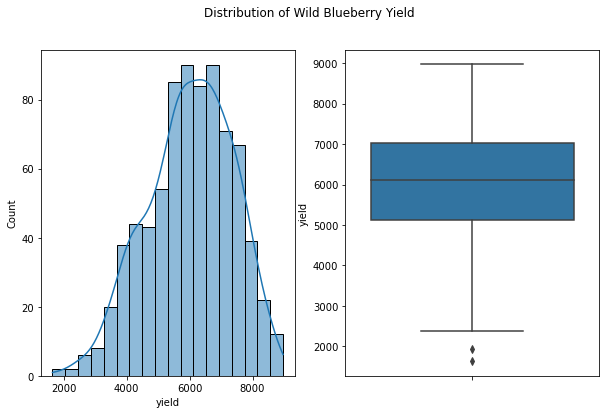

In [11]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
sns.histplot(data=df, kde=True, x='yield')
plt.subplot(1,2,2)
sns.boxplot(data=df, y='yield')
plt.suptitle('Distribution of Wild Blueberry Yield ')

In [12]:
import dabl

Target looks like regression


[<AxesSubplot:title={'center':'Target distribution'}, xlabel='yield', ylabel='frequency'>,
 array([[<AxesSubplot:title={'center':'F=9.82E-01'}, xlabel='fruitset', ylabel='yield'>,
         <AxesSubplot:title={'center':'F=-5.75E-01'}, xlabel='RainingDays (jittered)'>,
         <AxesSubplot:title={'center':'F=-4.98E-01'}, xlabel='clonesize (jittered)'>,
         <AxesSubplot:title={'center':'F=-3.41E-01'}, xlabel='honeybee (jittered)'>],
        [<AxesSubplot:title={'center':'F=3.15E-01'}, xlabel='osmia (jittered)', ylabel='yield'>,
         <AxesSubplot:title={'center':'F=2.86E-01'}, xlabel='bumbles (jittered)'>,
         <AxesSubplot:title={'center':'F=-1.61E-01'}, xlabel='MaxOfLowerTRange (jittered)'>,
         <AxesSubplot:title={'center':'F=1.23E-01'}, xlabel='andrena (jittered)'>]],
       dtype=object),
 None]

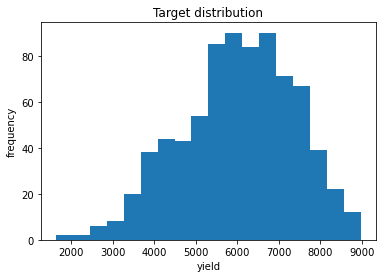

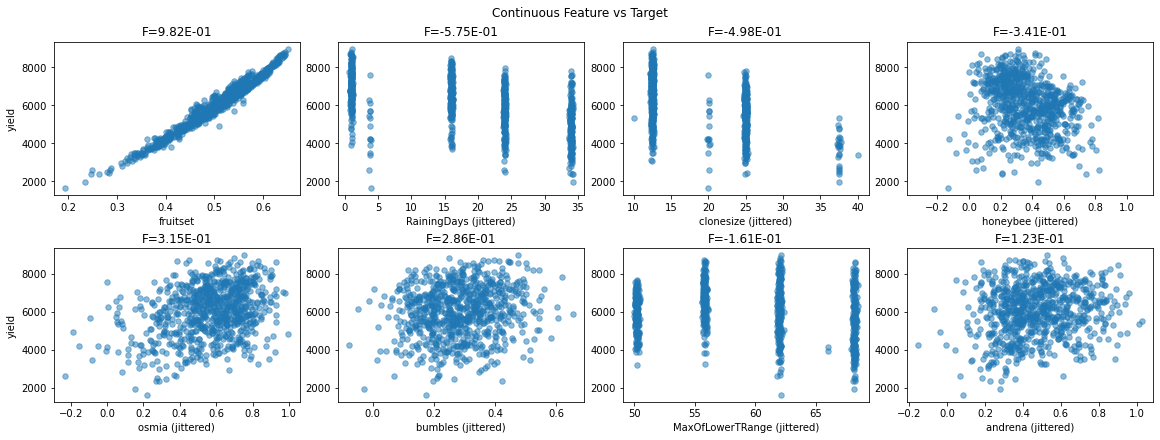

In [14]:
dabl.plot(df, target_col="yield")

<AxesSubplot:xlabel='bumbles'>

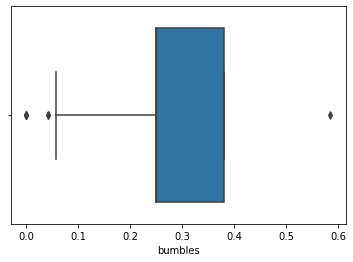

In [15]:
sns.boxplot(df["bumbles"])

<AxesSubplot:xlabel='honeybee'>

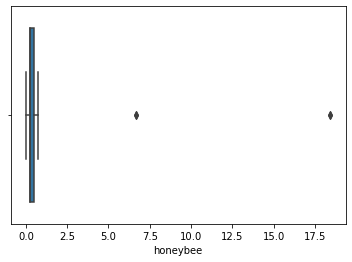

In [16]:
sns.boxplot(df["honeybee"])

<Figure size 1440x1440 with 0 Axes>

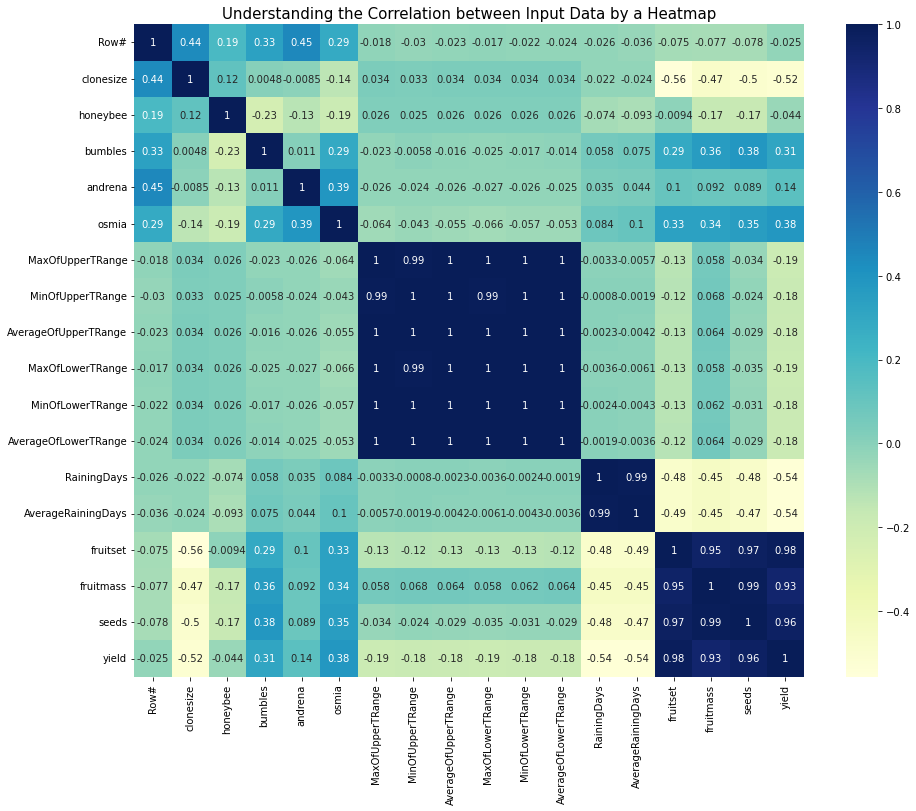

In [17]:
plt.figure(figsize=(20,20))
corr = df.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.title('Understanding the Correlation between Input Data by a Heatmap', fontsize=15)
plt.show()

[Text(0.5, 1.0, 'Yield vs bumbles')]

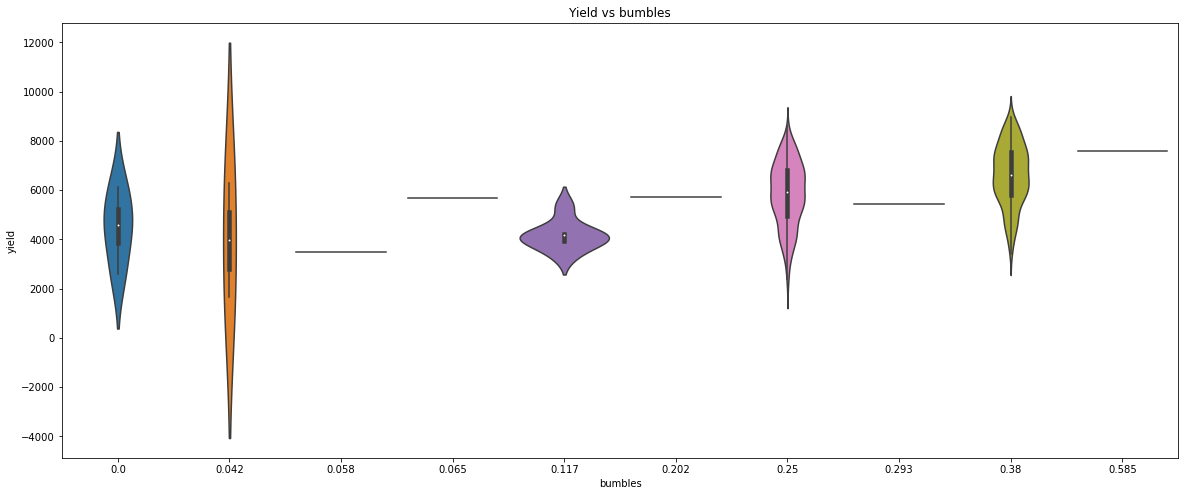

In [20]:
# Site EUI vs Building Class 
plt.figure(figsize=(20,8))
sns.violinplot(data=df, y='yield', x='bumbles').set(title='Yield vs bumbles')

In [21]:
print('Duplicate values:', df.duplicated().sum())

Duplicate values: 0


In [18]:
#splitting into independent and dependent features
X = df.drop(columns=['yield'])
y = df[['yield']]

In [19]:
X.head()


,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714


In [23]:
#calculating Inter-quartile Range (IQR)
q1 = X.quantile(0.25)
q3 = X.quantile(0.75)
iqr = q3 -q1
print(iqr)

Row#                    388.000000
clonesize                12.500000
honeybee                  0.250000
bumbles                   0.130000
andrena                   0.250000
osmia                     0.250000
MaxOfUpperTRange         11.600000
MinOfUpperTRange          5.200000
AverageOfUpperTRange      7.200000
MaxOfLowerTRange         10.200000
MinOfLowerTRange          3.000000
AverageOfLowerTRange      5.000000
RainingDays              20.230000
AverageRainingDays        0.290000
fruitset                  0.106571
fruitmass                 0.059869
seeds                     6.123577
dtype: float64


In [25]:
iqr_data = df[~((df < (q1 - 1.5 * iqr)) | (df> (q3 + 1.5 * iqr))).any(axis=1)]
iqr_data.shape

(752, 18)

In [27]:
iqr_data = iqr_data.reset_index().drop(["index"], axis=1)
iqr_data

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,754,25.0,0.50,0.38,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,1.0,0.10,0.558394,0.478666,39.448650,7184.013843
748,755,25.0,0.50,0.38,0.63,0.50,69.7,42.1,58.2,50.2,24.3,41.2,16.0,0.26,0.494678,0.429703,34.784888,6292.960756
749,756,25.0,0.50,0.38,0.63,0.50,69.7,42.1,58.2,50.2,24.3,41.2,1.0,0.10,0.502842,0.430369,35.185971,6374.444297
750,757,25.0,0.50,0.38,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.513889,0.458966,37.209554,6180.951419


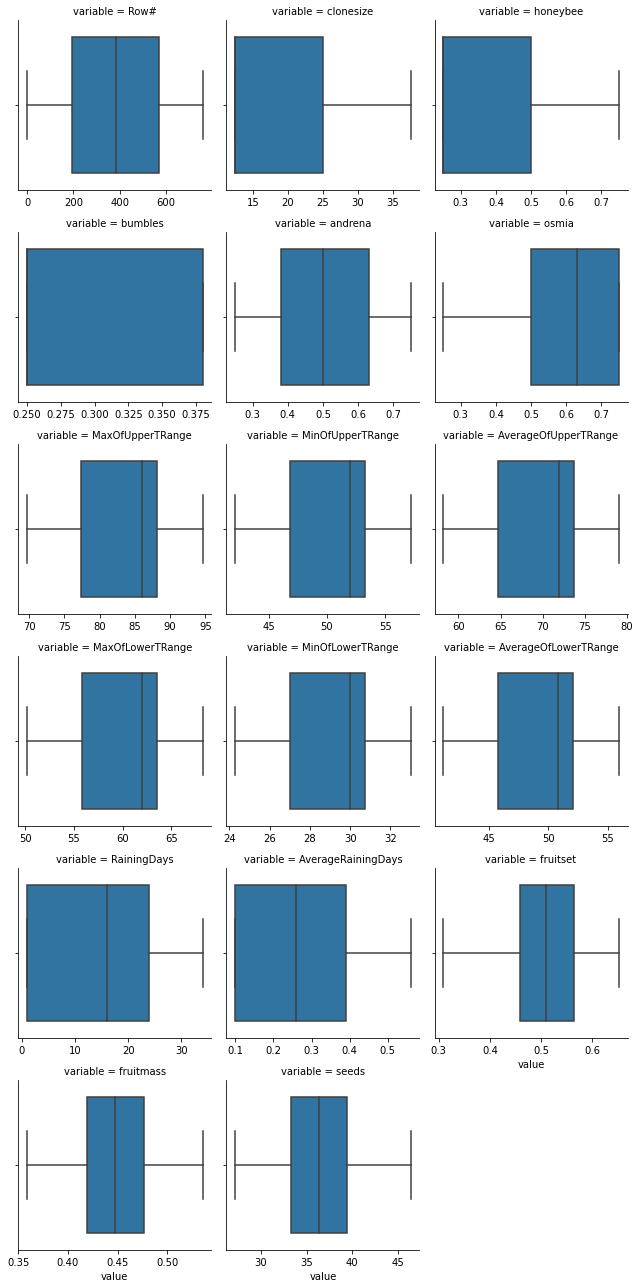

In [28]:
unpivot = pd.melt(iqr_data, iqr_data.describe().columns[-1], iqr_data.describe().columns[:-1])

g = sns.FacetGrid(unpivot, col="variable", col_wrap=3, sharex=False, sharey=False)
g.map(sns.boxplot, "value")

plt.show()

In [29]:
#splitting IQR processed data into independent and dependent features
X = iqr_data.drop(columns=['yield'])
y = iqr_data[['yield']]

In [30]:
#splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=0)

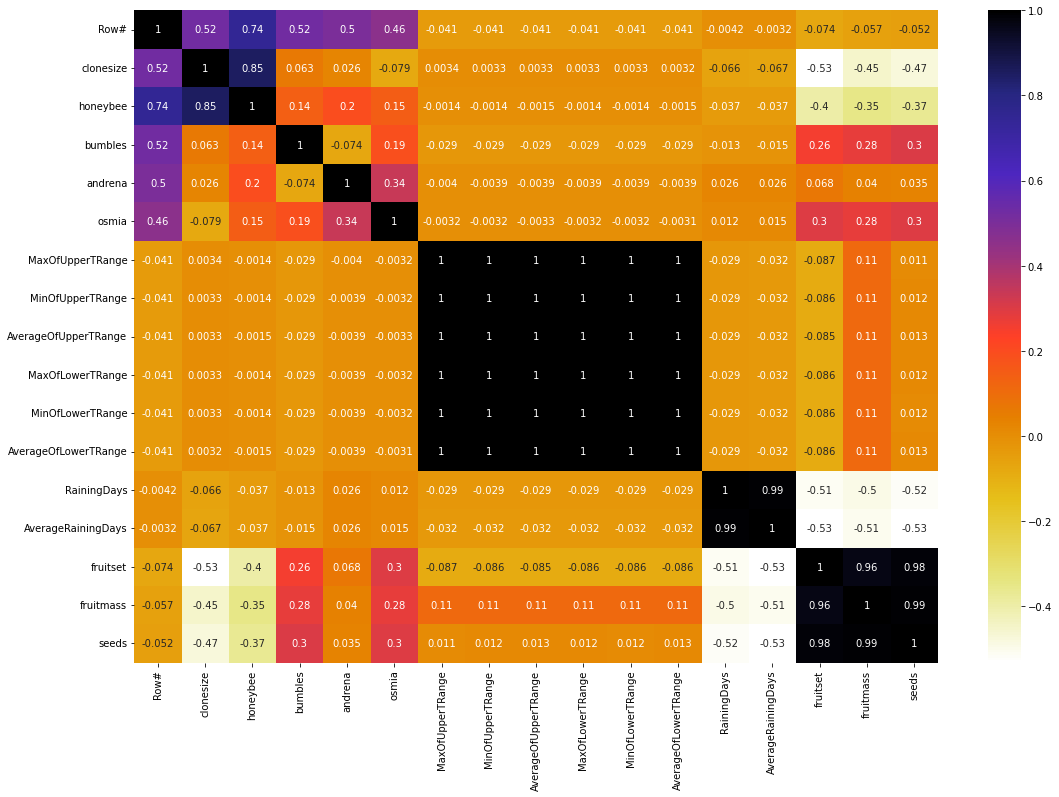

In [31]:
# Using Pearson Correlation
plt.figure(figsize=(18,12))
cor=X_train.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [32]:
#With this function, we can select highly correlated features
#The first feature that is correlated with any other feature will be removed

def correlation(dataset, threshold):
    col_corr = set()  #Set of all the names of Correlated Columns
    corr_matrix = dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i,j]) > threshold:  
                colname = corr_matrix.columns[i]  #getting the name of the column
                col_corr.add(colname)
    return col_corr

In [33]:
corr_features = correlation(X_train, 0.7)
len(set(corr_features))

9

In [34]:
corr_features = {'AverageOfLowerTRange',
 'AverageOfUpperTRange',
 'AverageRainingDays',
 'MaxOfLowerTRange',
 'MinOfLowerTRange',
 'MinOfUpperTRange',
 'honeybee'}
corr_features

{'AverageOfLowerTRange',
 'AverageOfUpperTRange',
 'AverageRainingDays',
 'MaxOfLowerTRange',
 'MinOfLowerTRange',
 'MinOfUpperTRange',
 'honeybee'}

In [35]:
X_train= X_train.drop(corr_features,axis=1)
X_test= X_test.drop(corr_features,axis=1)

In [36]:
X_train.shape

(601, 10)

In [37]:
X_test.shape

(151, 10)

Feature 0: 0.233963
Feature 1: 0.150027
Feature 2: 0.034829
Feature 3: 0.016573
Feature 4: 0.095969
Feature 5: 0.124847
Feature 6: 0.209084
Feature 7: 1.925528
Feature 8: 1.632590
Feature 9: 1.650936


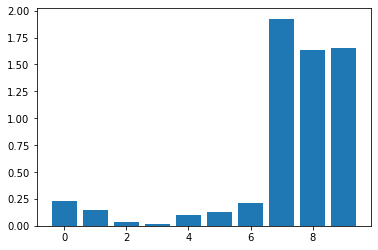

In [38]:
# Mutual Information feature selection 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression
 
# feature selection
def select_features_info_based(X_train, y_train, X_test):
    mutual_info = SelectKBest(score_func=mutual_info_regression, k='all')
    # learn relationship from training data
    mutual_info.fit(X_train, y_train)
    # transform train input data
    X_train_fs = mutual_info.transform(X_train)
    # transform test input data
    X_test_fs = mutual_info.transform(X_test)
    return X_train_fs, X_test_fs, mutual_info
 

# Feature Selection
X_train_fs, X_test_fs, fs_info = select_features_info_based(X_train, y_train, X_test)
fs_info
# what are scores for the features
for i in range(len(fs_info.scores_)):
    print('Feature %d: %f' % (i, fs_info.scores_[i]))
# plotting the scores
plt.bar([i for i in range(len(fs_info.scores_))], fs_info.scores_)
plt.show()

Feature 0: 0.007120
Feature 1: 181.436566
Feature 2: 50.396352
Feature 3: 6.262467
Feature 4: 80.579273
Feature 5: 13.139621
Feature 6: 291.735778
Feature 7: 19076.391809
Feature 8: 4263.896203
Feature 9: 9328.836779


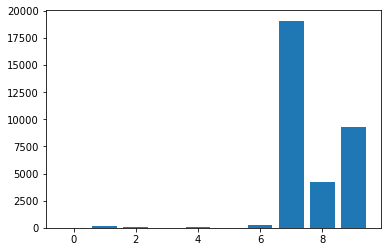

In [39]:
# Correlation feature selection 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
 
# Feature Selection
def select_features_corr_based(X_train, y_train, X_test):
    fs = SelectKBest(score_func=f_regression, k='all')
    # learning relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
# feature selection
X_train_fs, X_test_fs, fs_corr = select_features_corr_based(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs_corr.scores_)):
    print('Feature %d: %f' % (i, fs_corr.scores_[i]))
# plotting the scores
plt.bar([i for i in range(len(fs_corr.scores_))], fs_corr.scores_)
plt.show()

##### Why we need to do the feature selection  using mutual information gain and not correlation regression method?

**Feature Selection via the Correlation Regression Method is showing on 3 dominant features. While modelling, this could hamper the chances of the data being trained by other features, however small their effect on the target variable would be.**

**On the other hand, Feature Selection via Mutual Information Gain also shows 3 features that would highly affect the target variable but the other features would make a small effect too. So, ignoring the dependency by the other features would affect the accuracy. The graph shows better competency of the variables and hence we will go by this feature selection.**

### Modelling

**We will now Train the model on these 9 features and check the metrics of the same on 4 Models:**

<b>Linear Regression</b>

<b>Random Forest</b>

<b>Decision Tree</b>

<b>XGBoost</b>

In [40]:
X_train_fs_model, X_test_fs_model, fs_info = select_features_info_based(X_train, y_train, X_test)

In [41]:
X_train_fs_model.shape

(601, 10)

In [42]:
X_test_fs_model.shape

(151, 10)

In [44]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [45]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train_fs_model, y_train)
pred_linear = reg.predict(X_test_fs_model)

In [46]:
mae_linear = mean_absolute_error(y_test, pred_linear)
mse_linear = mean_squared_error(y_test, pred_linear)
rmse_linear = np.sqrt(mse_linear)
rsq_linear = r2_score(y_test, pred_linear)

print('MAE: %.3f' % mae_linear)
print('MSE: %.3f' % mse_linear)
print('RMSE: %.3f' % rmse_linear)
print('R-Square: %.3f' % rsq_linear)

MAE: 87.686
MSE: 12255.744
RMSE: 110.706
R-Square: 0.992


In [47]:
from sklearn.ensemble import RandomForestRegressor

# Defining the model and stating the random state to 1
rf_model = RandomForestRegressor(random_state=1)

# fitting the model
rf_model.fit(X_train_fs_model, y_train)
pred_rf=rf_model.predict(X_test_fs_model)
pred_rf=pred_rf.reshape(151,1)

mae_rf = mean_absolute_error(y_test, pred_rf)
mse_rf = mean_squared_error(y_test, pred_rf)
rmse_rf = np.sqrt(mse_rf)
rsq_rf = r2_score(y_test, pred_rf)

print('MAE: %.3f' % mae_rf)
print('MSE: %.3f' % mse_rf)
print('RMSE: %.3f' % rmse_rf)
print('R-Square: %.3f' % rsq_rf)

MAE: 110.679
MSE: 19121.902
RMSE: 138.282
R-Square: 0.988


In [48]:
from sklearn.tree import DecisionTreeRegressor

dtree_reg = DecisionTreeRegressor()
dtree_reg.fit(X_train_fs_model, y_train)
pred_dtree = dtree_reg.predict(X_test_fs_model)

mae_dtree = mean_absolute_error(y_test, pred_dtree)
mse_dtree = mean_squared_error(y_test, pred_dtree)
rmse_dtree = np.sqrt(mse_dtree)
rsq_dtree = r2_score(y_test, pred_dtree)

print('MAE: %.3f' % mae_dtree)
print('MSE: %.3f' % mse_dtree)
print('RMSE: %.3f' % rmse_dtree)
print('R-Square: %.3f' % rsq_dtree)

MAE: 174.748
MSE: 48541.878
RMSE: 220.322
R-Square: 0.970


In [49]:
import xgboost
from xgboost import XGBRegressor

xgb_model = XGBRegressor()
xgb_model.fit(X_train_fs_model, y_train)
pred_xgb = xgb_model.predict(X_test_fs_model) 

mae_xgb = mean_absolute_error(y_test, pred_xgb)
mse_xgb = mean_squared_error(y_test, pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
rsq_xgb = r2_score(y_test, pred_xgb)

print('MAE: %.3f' % mae_xgb)
print('MSE: %.3f' % mse_xgb)
print('RMSE: %.3f' % rmse_xgb)
print('R-Square: %.3f' % rsq_xgb)

MAE: 116.100
MSE: 21010.018
RMSE: 144.948
R-Square: 0.987


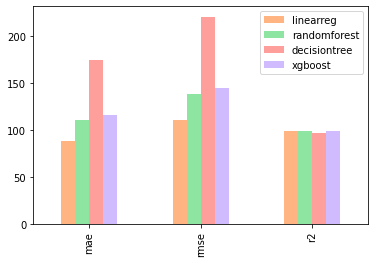

In [50]:
error_rec = {
    "linearreg": {
        "mae": mae_linear,
        "rmse": rmse_linear,
        'r2': rsq_linear*100
    },
    "randomforest": {
        "mae": mae_rf,
        "rmse": rmse_rf,
        'r2': rsq_rf*100
    },
    "decisiontree": {
        "mae": mae_dtree,
        "rmse": rmse_dtree,
        'r2': rsq_dtree*100
    },
    "xgboost": {
        "mae": mae_xgb,
        "rmse": rmse_xgb,
        'r2': rsq_xgb*100
    },
}
pd.DataFrame(error_rec).plot(kind="bar", 
             color=[
                 sns.color_palette("pastel")[1], 
                 sns.color_palette("pastel")[2], 
                 sns.color_palette("pastel")[3], 
                 sns.color_palette("pastel")[4]]);

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [52]:
cv = RepeatedKFold(n_splits= 78,n_repeats = 3,random_state = 1)
fs_info_v0 = SelectKBest(score_func = mutual_info_regression)

# define pipeline for each algorithm
# define GSCV for each
# loop through it


pipe_lr = Pipeline([
    ('sel', fs_info_v0), 
    ('model', LinearRegression())
])

pipe_rf = Pipeline([
    ('sel', fs_info_v0), 
    ('model', RandomForestRegressor(random_state=1))
])

pipe_dtree = Pipeline([
    ('sel', fs_info_v0), 
    ('model', DecisionTreeRegressor(random_state=1))
])

pipe_xgb = Pipeline([
    ('sel', fs_info_v0), 
    ('model', XGBRegressor(random_state=1))
])

In [53]:
param_range = [15, 18, 10]
param_range_fl = [5.0, 10.0]

grid_params_lr = [{'sel__k': [i for i in range(X_train_fs_model.shape[1]-6, X_train_fs_model.shape[1]-4)],
        }] 


grid_params_rf = [{'sel__k': [i for i in range(X_train_fs_model.shape[1]-6, X_train_fs_model.shape[1]-4)],
        'model__criterion': ['squared_error', 'absolute_error'],
#         'model__max_depth': param_range,
#         'model__min_samples_split': param_range[1:]
                  }]


grid_params_dtree = [{'sel__k': [i for i in range(X_train_fs_model.shape[1]-6, X_train_fs_model.shape[1]-4)],
                    'model__criterion': ['squared_error', 'absolute_error'],
#                      'model__max_depth': param_range,
#                      'model__max_features': ['auto', 'sqrt']
                     }]


grid_params_xgb = [{'sel__k': [i for i in range(X_train_fs_model.shape[1]-6, X_train_fs_model.shape[1]-4)],
#                     'model__max_depth': [9,12],
#                    'model__min_child_weight': [7,8],
                   'model__subsample': [i/10. for i in range(9,11)]
                   }]

LR = GridSearchCV(estimator=pipe_lr,
            param_grid=grid_params_lr,
            scoring='neg_mean_absolute_error',
            cv=cv)

RF = GridSearchCV(estimator=pipe_rf,
            param_grid=grid_params_rf,
            scoring='neg_mean_absolute_error',
            cv=cv, 
            n_jobs= -1)

DT = GridSearchCV(estimator=pipe_dtree,
            param_grid=grid_params_dtree,
            scoring='neg_mean_absolute_error',
            cv=cv, 
            n_jobs= -1)

XGB = GridSearchCV(estimator=pipe_xgb,
            param_grid=grid_params_xgb,
            scoring='neg_mean_absolute_error',
            cv=cv, 
            n_jobs= -1)

grids = [LR,RF,XGB,DT]

# Creating a dict for our reference
grid_dict = {0: 'Logistic Regression', 
        1: 'Random Forest',
        2: 'XGBoost',
        3: 'Decision Tree'}

In [60]:
def extract_best_model(grids: list, grid_dict: dict):
    print('Performing model optimizations...')
    least_mae = 270817
    best_regr = 0
    best_gs = ''
    for idx, gs in enumerate(grids):
        print('\nEstimator: %s' % grid_dict[idx])
        gs.fit(X_train_fs_model, y_train.values.ravel())
        print('Best Config: %s' % gs.best_params_)
        # Best training data accuracy
        print('Best MAE: %.3f' % gs.best_score_)
        # Predict on test data with best params
        y_pred_v0 = gs.predict(X_test_fs_model)
        # Test data accuracy of model with best params
        print('Test set mean absolute error for best params: %.3f ' % mean_absolute_error(y_test, y_pred_v0))
        print('Test set root mean squared error for best params: %.3f ' % np.sqrt(mean_absolute_error(y_test, y_pred_v0)))
        
        # Track best (least test error) model
        if mean_absolute_error(y_test, y_pred_v0) < least_mae:
            least_mae = mean_absolute_error(y_test, y_pred_v0)
            best_gs = gs
            best_regr = idx
    print('\nClassifier with least test set MAE: %s' % grid_dict[best_regr])

    #Save best grid search pipeline to file
    dump_file = 'best_grid_search_pipeline.pkl'
    joblib.dump(best_gs, dump_file, compress=1)
    print('\nSaved %s grid search pipeline to file: %s' % (grid_dict[best_regr], dump_file))
    
    return (grid_dict[best_regr], best_gs, least_mae)

In [61]:
best_model_name_v0, best_model_v0, least_mae_v0 = extract_best_model(grids= grids, grid_dict = grid_dict)

print(f"Best Model: {best_model_name_v0}")
print(f"Error Rate: {least_mae_v0}")
print(best_model_v0)

Performing model optimizations...

Estimator: Logistic Regression
Best Config: {'sel__k': 5}
Best MAE: -111.572
Test set mean absolute error for best params: 100.243 
Test set root mean squared error for best params: 10.012 

Estimator: Random Forest
Best Config: {'model__criterion': 'absolute_error', 'sel__k': 5}
Best MAE: -115.463
Test set mean absolute error for best params: 111.689 
Test set root mean squared error for best params: 10.568 

Estimator: XGBoost
Best Config: {'model__subsample': 0.9, 'sel__k': 5}
Best MAE: -115.861
Test set mean absolute error for best params: 120.101 
Test set root mean squared error for best params: 10.959 

Estimator: Decision Tree
Best Config: {'model__criterion': 'squared_error', 'sel__k': 5}
Best MAE: -155.265
Test set mean absolute error for best params: 158.470 
Test set root mean squared error for best params: 12.588 

Classifier with least test set MAE: Logistic Regression

Saved Logistic Regression grid search pipeline to file: best_grid_se

In [56]:
import joblib

In [62]:
grid_params_rf1 = [{
        'model__max_depth': param_range,
        'model__min_samples_split': [2,5]
                  }]

RF1 = GridSearchCV(
    estimator = Pipeline([
                    ('sel', SelectKBest(score_func=mutual_info_regression, k=9)), 
                    ('model', RandomForestRegressor(random_state=1, criterion='mse'))
                ]),
            param_grid=grid_params_rf1,
            scoring='neg_mean_absolute_error',
            cv=cv, 
            n_jobs= -1)


print("Random Forest V-1 optimising...")
RF1.fit(X_train_fs_model, y_train)
print('Best Config: %s' % RF1.best_params_)
print('Best MAE: %.3f' % RF1.best_score_)
y_pred_v1_rf1 = RF1.predict(X_test_fs_model)
print('Test set mean absolute error for best params: %.3f ' % mean_absolute_error(y_test, y_pred_v1_rf1))
print('Test set root mean squared error for best params: %.3f ' % np.sqrt(mean_absolute_error(y_test, y_pred_v1_rf1)))

Random Forest V-1 optimising...
Best Config: {'model__max_depth': 18, 'model__min_samples_split': 2}
Best MAE: -112.013
Test set mean absolute error for best params: 108.681 
Test set root mean squared error for best params: 10.425 


In [63]:

# Save the random forest grid search pipleline for backup
dump_file_name1 = 'randomforest_blueberry_pollination_tuned_model.joblib'
joblib.dump(RF1, dump_file_name1, compress=1)
print('\nSaved %s tuned model to directory by name: %s' % ("Random Forest", dump_file_name1))


Saved Random Forest tuned model to directory by name: randomforest_blueberry_pollination_tuned_model.joblib


In [64]:
pd.DataFrame(X_test_fs_model).to_csv("X_test_rf_df.csv")
print("\nSaved X_test for RF to CSV")

# # Save final training dataset for backup
joblib.dump(X_train_fs_model, "X_train_rf.joblib")
print("\n Saved X_train for RF to joblib file")


Saved X_test for RF to CSV

 Saved X_train for RF to joblib file


In [65]:
joblib.dump(y_test, "y_test.joblib", compress=1)
print("\nSaved y_test to joblib file")


Saved y_test to joblib file
